## El ataque de los tiburones

En este ejercicio vamos a tratar con el dataset "Global Shark Attacks" que recoge una base de datos de incidentes humano-tiburón. Más información sobre el dataset aquí:
http://www.sharkattackfile.net/index.htm 

### 1. Descarga de datos

Hay una descripción en Kaggle, esta es la página Web:
https://www.kaggle.com/teajay/global-shark-attacks

Y el enlace a la descarga directa es el siguiente:
https://www.kaggle.com/teajay/global-shark-attacks/downloads/global-shark-attacks.zip 
Nótese que kaggle requiere identificarse, por lo que no pueden descargarse sin autentificación los ficheros. 

Se pide lo siguiente:
* Cargad el fichero en un `DataFrame` de `pandas`.
* Comparad las columns cargadas con las del fichero Excel. ¿Hay información que deberíamos quitar? Nota: con `columns` podemos obtener la lista de columnas del DataFrame.


In [1]:
import pandas as pd
tiburones = pd.read_excel("GSAF5.xls")
tiburones.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.10.15,15-Oct-2016,2016.0,Unprovoked,AUSTRALIA,Queensland,"Kings Beach, Caloundra",Surfing,Cooper Hallam,M,...,NaN,"Daily Mail, 10/16/2016",2016.10.15-Hallam.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.10.15,2016.10.15,6993.0,NaN,NaN
1,2016.10.24,24-Oct-2016,2016.0,Unprovoked,AUSTRALIA,New South Wales,Broken Head Beach,Surfing,Jade Fitzpatrick,M,...,NaN,"Daily Mail, 10/24/2016",2016.10.24-Fitzpatrick.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.10.24,2016.10.24,6005.0,NaN,NaN
2,2016.10.21,21-Oct-2016,2016.0,Unprovoked,USA,Hawaii,"Hooipa Beach Park, Maui",Surfing,Federico Jaime,M,...,5' shark,"Surfline, 10/23/2016",2016.10.21-Hookipa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.10.21,2016.10.21,6004.0,NaN,NaN


In [2]:
tiburones.shape

(25580, 24)

Lo primero que comprobamos es que aparentemente en el fichero hay 16 columnas, y el dataframe ha leído 24. Seis de ellas están ocultas en el Excel y se pueden mostrar, pero probablemente los creadores no querían que utilizásemos esos datos, quizá porque no tienen valor o no son fiables. 

Además, hay dos columnas que se rellenan como nulos al final, que deberíamos eliminar.

In [3]:
tiburones.columns

Index([           u'Case Number',                   u'Date',
                         u'Year',                   u'Type',
                      u'Country',                   u'Area',
                     u'Location',               u'Activity',
                         u'Name',                   u'Sex ',
                          u'Age',                 u'Injury',
                  u'Fatal (Y/N)',                   u'Time',
                     u'Species ', u'Investigator or Source',
                          u'pdf',           u'href formula',
                         u'href',          u'Case Number.1',
                u'Case Number.2',         u'original order',
                  u'Unnamed: 22',            u'Unnamed: 23'],
      dtype='object')

In [4]:
tiburones.columns.size

24

In [5]:
tiburones = tiburones.drop(["Unnamed: 22", "Unnamed: 23"], axis=1)
tiburones.columns.size

22

### 2. Observación de valores nulos

El siguiente paso es observar los datos, los valores que toman y si hay valores nulos.
* Identificad las columnas en las que hay valores nulos y las que no y cuántas en cada una. Por ejemplo, parece que las hay en la columna Species. Nota: usar `isnull()`
* Para las columnas con información categórica, observar las etiquetas de cada categoría, por ejemplo, las especies de tiburones o el tipo de incidente.
* Concretamente, obtener las 5 especies de tiburón con más incidentes registrados en la base de datos. Nota: Puede hacers con `groupby()` o dividiendo el array por especies, y contando cada subconjunto.

Podemos hacerlo columna por columna:

In [6]:
tiburones["Species "].isnull().values.any()   # Cuidado, tiene un blanco al final el nombre de la columna.

True

In [9]:
tiburones["Species "].isnull().values.sum()

22518

Vemos que hay bastantes. Si las comparamos con el total de filas comprobamos que solo hay un pequeño porcentaje relleno.

In [12]:
tiburones["Species "].isnull().values.sum() / tiburones.size.astype("float")

0.040013504868860614

Si queremos de una manera rápida ver las cuentas de nulos, podemos hacerlo de la siguiente forma.


In [13]:
por_especies = tiburones.groupby("Species ")
por_especies["Species "].count().sort_values(ascending=False).head()

Species 
White shark                        163
Shark involvement not confirmed     80
Tiger shark                         68
Bull shark                          52
6' shark                            40
Name: Species , dtype: int64

Otra columna categórica interesante es `Type.`

In [14]:
por_tipo = tiburones.groupby("Type")
por_tipo["Type"].count()

Type
Boat             200
Boating          110
Invalid          521
Provoked         557
Sea Disaster     220
Unprovoked      4396
Name: Type, dtype: int64

### 3. Más valores nulos

Vamos a examinar la ocurrencia de eventos por años y países. Para ello:

* Queremos utilizar como índice (país, año) primero. Probar a establecerlo con `set_index()`. ¿Hay algún problema de valores nulos en el índice? ¿Son NA o también hay años no válidos?  ¿Cómo se pueden eliminar?

* Obtener la cuenta de los incidentes en USA en 2014 y 2015. Utilizad `loc` e `iloc` en la misma expresión. 



Si observamos el final del dataframe, vemos que hay valores nulos en ambas claves del índice.

In [15]:
multi_tiburones = tiburones.set_index(["Country", "Year"])
multi_tiburones.tail()

Case Number Date Type Area Location Activity Name Sex   Age  \
Country Year                                                               
NaN     NaN          NaN  NaN  NaN  NaN      NaN      NaN  NaN  NaN  NaN   
        NaN          NaN  NaN  NaN  NaN      NaN      NaN  NaN  NaN  NaN   
        NaN          NaN  NaN  NaN  NaN      NaN      NaN  NaN  NaN  NaN   
        NaN          NaN  NaN  NaN  NaN      NaN      NaN  NaN  NaN  NaN   
        NaN           xx  NaN  NaN  NaN      NaN      NaN  NaN  NaN  NaN   

             Injury Fatal (Y/N) Time Species  Investigator or Source  pdf  \
Country Year                                                                
NaN     NaN     NaN         NaN  NaN      NaN                    NaN  NaN   
        NaN     NaN         NaN  NaN      NaN                    NaN  NaN   
        NaN     NaN         NaN  NaN      NaN                    NaN  NaN   
        NaN     NaN         NaN  NaN      NaN                    NaN  NaN   
        NaN     NaN         NaN  NaN      NaN                    NaN  NaN   

             href formula href Case Number.1 Case Number.2  original order  
Country Year                                                                
NaN     NaN           NaN  NaN           NaN           NaN             NaN  
        NaN           NaN  NaN           NaN           NaN             NaN  
        NaN           NaN  NaN           NaN           NaN             NaN  
        NaN           NaN  NaN           NaN           NaN             NaN  
        NaN           NaN  NaN           NaN           NaN             NaN

In [17]:
# Forzamos a que se eliminen en la misma copia del dataframe.
tiburones.dropna(subset=["Country", "Year"], inplace=True)
multi_tiburones = tiburones.set_index(["Country", "Year"])
multi_tiburones.tail(3)

,,Case Number,Date,Type,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Country,Year,,,,,,,,,,,,,,,,,,,,
USA,0.0,ND.0003,1900-1905,Unprovoked,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
PANAMA,0.0,ND.0002,1883-1889,Unprovoked,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0
CEYLON (SRI LANKA),0.0,ND.0001,1845-1853,Unprovoked,Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0


In [29]:
tiburones = tiburones[tiburones["Year"]!=0]
multi_tiburones = tiburones.set_index(["Country", "Year"])
multi_tiburones.tail(3)

,,Case Number,Date,Type,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
Country,Year,,,,,,,,,,,,,,,,,,,,
VENEZUELA,1543.0,1543.00.00,Ca. 1543,Unprovoked,Magarita or Cubagua Islands,NaN,Pearl diving,Indian slave,M,NaN,FATAL,Y,NaN,NaN,J. Castro,1543.00.00.R-LasCasas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1543.00.00,1543.00.00,129.0
MEXICO,500.0,0500.00.00,Circa 500 A.D.,Unprovoked,NaN,NaN,NaN,male,NaN,NaN,Foot severed,N,NaN,NaN,J. Castro,500AD-Mexico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0500.00.00,0500.00.00,128.0
AUSTRALIA,5.0,0005.00.00,Ca. 5 A.D.,Unprovoked,New South Wales,Bondi,NaN,male,M,NaN,Aboriginal rock carving depicts man being atta...,N,NaN,NaN,Waverly Library,0005.00.00-AustralianAboriginal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0005.00.00,0005.00.00,126.0


In [36]:
multi_tiburones.loc["USA"].iloc[2015].count()

19

### 4. Distribución y correlaciones (i)

Ahora queremos observar la distribución de los incidentes, primero por países y luego por años.

* Mostrar los tres países que tienen más incidentes. 
* Dibujar la distribución por años de los incidentes, señalar el año en el que más se han producido. 
* Para los dos países con más incidentes, mostrar su evolución por años.

In [199]:
cols = ["Country", "Year"]
tiburones[cols].groupby("Country").count().sort_values("Year", ascending=False).head(3)

,Year
Country,
USA,2105
AUSTRALIA,1267
SOUTH AFRICA,557


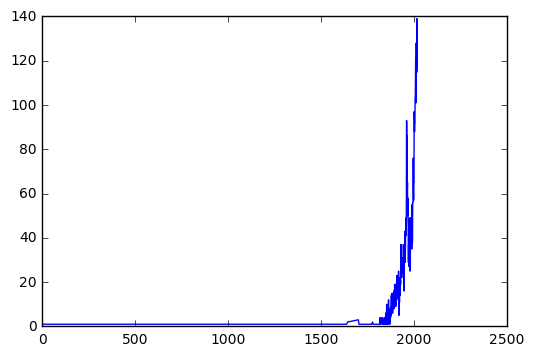

In [205]:
%matplotlib inline
import matplotlib.pyplot as plt
by_year = tiburones[cols].groupby("Year").count()
plt.plot(by_year) # GroupBy ordena por defecto

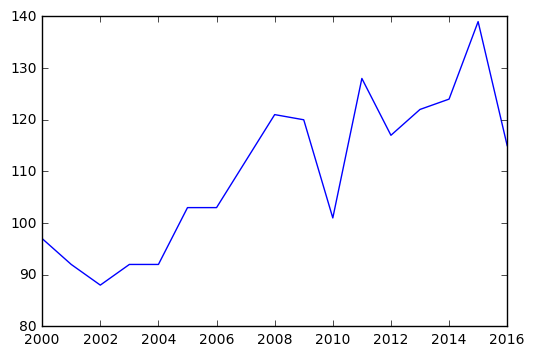

In [279]:
plt.plot(by_year[2000:2016])

In [281]:
print by_year.idxmax(), by_year.max()


 Country    2015.0
dtype: float64 Country    139
dtype: int64


### 5. Distribución y correlaciones (ii)

A continuación, queremos examinar el sexo y la edad de los implicados en incidentes. 

Mostrad la distribución de los incidentes por sexo, e intentad obtener la media de la edad de los implicados en los incidentes.

Observad:
* Valores nulos o valores que parecen incorrectos.
* El tipo de los valores de la columna "Age". Si fuese necesario cambiarlos, buscar formas de convertir de valores de cadena a valores numéricos en pandas.

In [257]:
cols=["Sex ", "Age"]
por_sexo = tiburones[cols].dropna().groupby("Sex ")
por_sexo.groups.keys()

[u'lli', u'M', u'M ', u'F']

In [272]:
por_sexo.count()

,Age
Sex,
F,424
M,2832
M,1
lli,1


In [271]:
tiburones["Age"].unique()

array([nan, 36, 66, 25, 29, 21, 32, 17, 16, 43, u'60s', 51, 50, 12, 9, 22,
       37, 20, 49, 15, 40, 72, 18, 31, 11, 10, 59, 42, 34, 35, 19, 6, 27,
       64, 60, 23, 52, 13, 57, 48, 39, 24, 26, 69, 46, u'Teen', 41, 45, 65,
       38, 71, 58, 28, 54, 44, 14, 7, 62, u'40s', u'38', u'39', u'23',
       u'32', u'52', u'68', u'12', u'18', u'19', u'43', u'47', u'6', u'37',
       u'9', u'36', u'10', u'16', u'13', u'11', u'17', u'14', u'30', u'50',
       u'29', u'65', u'63', u'26', u'71', u'48', u'70', u'58',
       u'18 months', u'22', u'41', u'35', u'57', u'20', u'34', u'15',
       u'44', u'53', u'7', u'40', u'28', u'20s', u'33', u'30s', u'31',
       u'45', u'50s', u'8', u'51', u'61', u'42', 55, u'25', u'teen', u'66',
       u'21', u'24', u'77', u'46', u'60', u'74', u'55', u'27', u'3', u'56',
       u'64', u'28 & 26', u'62', u'5', u'49', u'54', u'86', u'59',
       u'18 or 20', u'12 or 13', u'46 & 34', u'28, 23 & 30', u'Teens', 77,
       47, 30, 8, 63, 61, 56, u'36 & 26', u'8 or 10', 

Para limpiar la columna de la edad, podemos intentar convertir a entero y en caso de que no se pueda convertir, tenemos un caso de NA.

In [284]:
# Esto no funciona porque no hay conversión para todos:
#tiburones["Age"] = tiburones["Age"].astype(np.int)

In [296]:
# pd.to_numeric() es otra opcion

tiburones["Age"] = pd.to_numeric(tiburones["Age"], errors="coerce")

In [298]:
tiburones["Age"].mean()

27.1659375

### 6. La curiosidad del data scientist

Finalmente, ¿qué más se puede examinar en el dataset que sea interesante?